                    Aula: Classificações de intenções de IA

-> langchain: O langchain é um framework (uma estrutura de trabalho) que facilita a criação de aplicações complexas com modelos de linguagem, como o gemini. Pense nele como uma "caixa de ferramentas" para desenvolvedores que
querem construir algo mais sofisticado do que apenas uma simples chamada
á API.
   O langchain permite que você "encadeie" (dai o nome "Language Chain")
   diferentes componentes para construir uma aplicação completa. Ele pode
   fazer coisas como:

   -> Chamar diferentes modelos de linguagem: Ele tem conectores para o
   Gemini, OpenAi, e outros. Isso permite que você troque de modelo
   facilmente.

   -> Conectar modelos a fontes de dados: O LangChain permite que o seu
   modelo de linguagem acesse informações externas, como documentos, bases
   de dados ou até mesmo na internet. Isso é o que permite que ele responda
   perguntas sobre informações que ele não tem "na memória".

   -> Integrar com outras ferramentas: Ele pode se conectar a ferramentas
   como calculadoras, calendários ou APIs de busca, permitindo que o modelo
   execute ações no mundo real.

   -> Gerenciar Conversas: O LangChain ajuda a manter o "contexto" de uma
   conversa com um chatbot, para que ele possa se lembrar do que foi dito
   nas mensagens anteriores.
   
   Em resumo, se a API do Gemini é o "motor" da sua aplicação, o LangChain
   é o "chassi" e a "transmissão" que permite que você construa o carro
   completo, com todos os recursos que você precisa.

-> from langchain_google_genai: Esta é a biblioteca que conecta o langchain aos
modelos de IA generativa do Google (como o gemini). Ela contém todas as ferra
mentas necessárias para interagir com a API do Gemini.

-> import ChatGoogleGenerativeAI: Esta é a classe especifica que você precisa
para criar uma instância do modelo. Ela atua como um "conector" ou "adaptador"
entre a estrutura do langchain e a API do gemini. Quando você cria um objeto
a partir desta classe (hatGoogleGenerativeAI), ele se torna a sua ponte de
comunicação com o modelo de linguagem do Google.



In [2]:
from langchain_google_genai import ChatGoogleGenerativeAI

Acessando a chave da API na variável de ambiente

In [3]:
# Import da biblioteca que tem como objetivo acessar variáveis de ambiente
# com o objetivo de acessar a chave da nossa API.
import os

# Import da função que irá carregar as variáveis ambientes    
from dotenv import load_dotenv

# Carregando a variável de ambiente no código 
load_dotenv()

# função da biblioteca que irá acessar o valor da nossa variável
# de ambiente (a chave da nossa API). A função irá receber como
# argumento o nome da variável que irá conter a chave da API.*
api_key = os.getenv('GOOGLE_API_KEY')

# Essa estrutura condicional irá verificar se a chave foi carregada
# ou não no código
if api_key:
    
    # Se a condição for verdadeira, iremos apresentar essa mensagem
    print("A chave foi carregada")

else:
    
    # Se a condição for falsa, iremos apresentar essa mensagem
    print("A chave não foi carregada")

A chave foi carregada


Criando a classe do modelo de IA

In [4]:
# Instância da classe que irá criar o modelo do gemini
# que iremos utilizar na construção do agente. A classe
# irá receber em seu construtor os seguintes argumentos:
llm = ChatGoogleGenerativeAI(
    
    # O modelo de IA que será utilizado
    model = "gemini-2.5-flash",
    
    # A temperatura que irá definir o nivel de criatividade
    # do modelo utilizado.
    temperature = 0,
    
    # A chave que irá nos conectar a API do modelo escolhido
    api_key = api_key
    
    

)

Criando a nossa primeira interação com o modelo

In [5]:
# Irá conter a instrução que o usuário passará para o modelo
pergunta = str(input("Faça uma pergunta: "))

# Ira conter a resposta do modelo utilizando a função 
# invoke que tem como objetivo coletar a instrução do
# usuário (variável "pergunta") e criar uma resposta
resposta = llm.invoke(pergunta)

# Impressão da resposta utilizando o atributo content que
# irá conter apenas a resposta do modelo. Dessa maneira,
# a saida nao irá mostrar os outros atributos da classe.
print(resposta.content)

Olá! Tudo bem?


Aprimorando a nossa interação com o modelo: Resolvi fazer algo um pouco diferente da aula e criei um loop infinito que possibilita que o usuário
consiga ter uma conversa com o modelo.

In [6]:
# Ira criar o loop while infinito
while True:
    
    # Ira conter a instrução do usuário. O upper irá converter
    # todas as letras da instrução em maiusculas, dessa maneira
    # conseguiremos validar as instruções independente da maneira
    # que o usuário as digitar.
    pergunta = str(input("Faça uma pergunta: ")).upper()

    # Irá conter a resposta do modelo.
    resposta = llm.invoke(pergunta)

    # Irá imprimir a resposta do modelo.
    print(resposta.content)
    
    # Ira verificar se o usuário digitou a palavra "TCHAU"
    if pergunta == "TCHAU":
        
        # Se a condição for verdadeira iremos imprimir uma mensagem
        # e encerrar a sessão do usuário (usando a função break)
        print("Sessão Encerrada")
        
        break

Olá! Como posso ajudar?
Tchau!
Sessão Encerrada


Agora, iremos definir o prompt que irá ditar o comportamento do nosso modelo
de agente que irá analisar a solicitação e classifica-la em grupos das seguintes categorias:

grupo decisão: "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO"

grupo urgencia:  "BAIXA" | "MEDIA" | "ALTA"

grupo campos faltantes: Irá solicitar ao usuário que ele passe mais informações

In [7]:
TRIAGEM_PROMPT = (
    "Você é um triador de Service Desk para políticas internas da empresa Carraro Desenvolvimento. "
    "Dada a mensagem do usuário, retorne SOMENTE um JSON com:\n"
    "{\n"
    '  "decisao": "AUTO_RESOLVER" | "PEDIR_INFO" | "ABRIR_CHAMADO",\n'
    '  "urgencia": "BAIXA" | "MEDIA" | "ALTA",\n'
    '  "campos_faltantes": ["..."]\n'
    "}\n"
    "Regras:\n"
    '- **AUTO_RESOLVER**: Perguntas claras sobre regras ou procedimentos descritos nas políticas (Ex: "Posso reembolsar a internet do meu home office?", "Como funciona a política de alimentação em viagens?").\n'
    '- **PEDIR_INFO**: Mensagens vagas ou que faltam informações para identificar o tema ou contexto (Ex: "Preciso de ajuda com uma política", "Tenho uma dúvida geral").\n'
    '- **ABRIR_CHAMADO**: Pedidos de exceção, liberação, aprovação ou acesso especial, ou quando o usuário explicitamente pede para abrir um chamado (Ex: "Quero exceção para trabalhar 5 dias remoto.", "Solicito liberação para anexos externos.", "Por favor, abra um chamado para o RH.").'
    "Analise a mensagem e decida a ação mais apropriada."
)

-> Esse trecho de código usa a biblioteca Pydantic para criar um "molde" ou
"blueprint" para a estrutura de dados que você quer que o modelo do Gemini
retorne.

-> Ele garante que a resposta do modelo tenha exatamente o formato JSON
que você definiu no seu TRIAGEM_PROMPT, evitando erros e tornando a resposta
fácil de ser processada pelo seu código Python.

In [8]:
# Importa as classes BaseModel e Field da biblioteca pydantic
from pydantic import BaseModel, Field

# Biblioteca  que irá importar os tipos de dados necessários para
# a criação da estrutura do modelo.
# Literal: Serve para limitar um campo a um conjunto especifico de valores.
# Por exemplo, Literal ["BAIXA", "MEDIA", "ALTA"] garante que a "urgencia"
# só pode ter um desses três valores.

# List: Indica que o campo será uma lista.

# 
from typing import Literal, List, Dict

# Ira criar a nossa classe de modelo que urá herdar a classe BaseModel
class TriagemOut(BaseModel):
    
    # Define o campo "decisão" com base nos valores que especificamos
    # no prompt.
    decisao: Literal["AUTO_RESOLVER", "PEDIR_INFO", "ABRIR_CHAMADO"]
    
    # Define o campo "urgencia" com base nos valores que especificamos
    # no prompt.
    urgencia: Literal["BAIXA", "MEDIA", "ALTA"]
    
    # Define que o campo "campos_faltantes" será uma lista de strings. O
    # Field (default_factory=list) garante que, se o modelo não retornar
    # nada para esse campo, ele será iniciado como uma lista vázia [], o
    # que evita erros no código. 
    # Observação: o default_factory irá definir o valor padrão da lista
    # (se o modelo não atribuir nenhum valor a lista).
    campos_faltantes: List[str] = Field(default_factory=list)
 

Vamos agora criar agora o objeto que utilizaremos para construir o agente de IA 

In [9]:
# Instância da classe
llm_triagem = ChatGoogleGenerativeAI(
    
    # Modelo que será utilizado
    model = 'gemini-2.5-flash',
    
    # Nivel de criativiade do modelo
    temperature = 0,
    
    # Chave que irá permitir a conexão com a API do google.
    api_key = api_key
)

Esse trecho irá definir a função "triagem", que usa o langchain para automatizar o processo de análise e classificação de uma mensagem. A função
é a ponte entre a mensagem do usuário e o modelo do Gemini.

In [10]:
from langchain_core.messages import SystemMessage, HumanMessage

# Ira criar a cadeia que faz duas coisas:
# chama o modelo: Ela usa a instância do modelo que criamos (llm_triagem).

# Garante o formato de saida: O método with_strNuctured_output(TriagemOut)
# instrui o modelo a retornar a resposta em um formato que corresponde
# exatamente a classe TriagemOut que você definiu com o Pydantic. Isso
# garante que a saida será um JSON válido.
triagem_chain = llm_triagem.with_structured_output(TriagemOut)

# Define a função triagem, que recebe como argumento a mensagem do usuário e retornara um dicionário
def triagem(mensagem: str) -> Dict:
    
    # Ira conter a função invoke que recebera como argumento:
    saida: TriagemOut = triagem_chain.invoke([
        
        # Define a instrução inicial para o modelo. Ele diz ao Gemini qual
        # papel ele deve assumir (triador de Service Desk) e quais regras
        # ele deve seguir.
        SystemMessage(content=TRIAGEM_PROMPT),
        
        # Ira conter a mensagem do usuário para o modelo.
        HumanMessage(content=mensagem)
        
    ]
    )
    
    # O pydantic retorna a resposta como um objeto TriagemOut. O método
    # model_dump() converte esse objeto para um dicionário padrão do Python,
    # o que facilita o uso posterior no seu código, como a leitura dos campos
    # "decisao", "urgencia", etc. 
    return saida.model_dump()
    


Vamos agora testar o modelo criando uma lista de perguntas para ele classificar as perguntas

In [11]:
testes = ["Posso reembolsar a internet?", "Quero mais dias de trabalho remoto, como faço?", "posso reembolsar cursos ou treinamentos da Alura?", "Quantas capivaras tem no rio pinheiros"]

In [12]:
# For que irá percorrer a lista de testes com o objetivo de acessar e passar
# para o modelo todas as peguntas da lista
for mensagem_texto in testes:
    
    # Ira imprimir a instrução do usuário (mensagem_texto que contém o conteudo do for) e a
    # resposta do modelo (classificação da instrução).
    print(f"Pergunta: {mensagem_texto}\n -> Resposta: {triagem(mensagem_texto)}\n")

Pergunta: Posso reembolsar a internet?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quero mais dias de trabalho remoto, como faço?
 -> Resposta: {'decisao': 'ABRIR_CHAMADO', 'urgencia': 'MEDIA', 'campos_faltantes': []}

Pergunta: posso reembolsar cursos ou treinamentos da Alura?
 -> Resposta: {'decisao': 'AUTO_RESOLVER', 'urgencia': 'BAIXA', 'campos_faltantes': []}

Pergunta: Quantas capivaras tem no rio pinheiros
 -> Resposta: {'decisao': 'PEDIR_INFO', 'urgencia': 'BAIXA', 'campos_faltantes': []}



            Aula 2: Construindo a base de conhecimento com RAG

-> Esse trecho de código tem como objetivo carregar todos os arquivos PDF
de uma pasta chamada "pdfs" e converte-los em documentos que podem ser
processados por um modelo de linguagem.

In [13]:
# A biblioteca pathlib é usada para trabalhar com caminhos de arquivos e
# pastas de uma maneira mais simples e orientada a objetos do que a 
# biblioteca "os" tradicional.
from pathlib import Path

# Esta linha importa uma ferramenta especifica do langchain-community que
# sabe como ler e extrair o texto de arquivos PDF.
from langchain_community.document_loaders import PyMuPDFLoader 

# Ira criar uma lista vázia que conterá todos os documentos utilizados 
# na construção do agente.
docs = []

# for que irá carregar e inserir os documentos na lista de docs
# que serão utilizados
# Path("pdfs"): Usa a classe path para acessar o caminho dos arquivos
# em PDF.
# glob: Função da classe PATH que procura por todos os arquivos dentro
# dessa pasta que terminam com a extensão .pdf. 
for ndocs in Path("pdfs").glob("*.pdf"):
    
    # Try e except: Essa estrutura é um tratamento de erros. Se um arquivo
    # PDF estiver corrompido ou algum problema, o programa não vai parar,
    # em vez disso, ele irá para o bloco except e imprimirá uma mensagem
    # de erro.
    try:
        # Irá criar a classe que constrói um carregador de arquivos PDF.
        # Ele recebe o caminho do arquivo como um argumento. O str(ndocs)
        # converte o pathlib para uma string que o carregador pode entender
        loader = PyMuPDFLoader(str(ndocs))
        
        # Esta linha executa o carregamento dos arquivos. O método loader.
        # load() lê o conteúdo do PDF, divide-o em documentos (geralmente
        # uma página por documento) e retorna uma lista. O metodo extend
        # adiciona todos esses documentos á lista que nós criamos.
        docs.extend(loader.load())
        
        # Irá imprimir o nome dos arquivos carregados usando o atributo
        # name que retorna apenas o nome dos documentos
        print(f"O arquivo {ndocs.name} foi carregado com sucesso")
    
    except Exception as erro:
        
        print(f"Erro ao carregar o arquivo {ndocs.name}: {erro}")
 
 # Ira imprimir a quantidade de arquivos carregados. O len retorna
 # o tamanho da lista (quantidade de arquivos inseridos nele)
print(f"Total de documentos carregados: {len(docs)}")   
    

O arquivo Política de Reembolsos (Viagens e Despesas).pdf foi carregado com sucesso
O arquivo Política de Uso de E-mail e Segurança da Informação.pdf foi carregado com sucesso
O arquivo Políticas de Home Office.pdf foi carregado com sucesso
Total de documentos carregados: 3


-> Esse trecho de código é responsável por pegar todos os documentos que
carregamos e dividi-los em espaços menores, o que é um passo fundamental
para o funcionamento do nosso projeto de RAG. Iremos fazer isso por que
o modelo de linguagem não consegue processar documentos inteiros de uma
vez, por isso precisamos "quebra-los" em partes menores.

In [14]:
# Esta linha importa a classe RecursiveCharacterTextSplitter da biblioteca
# langchain_text_splitters. Essa ferramenta é a que usaremos para fazer a
# divisão do texto. Ela é inteligente porque tenta dividir os documentos
# de forma lógica (por paragráfos, frases, etc) antes de simplesmente
# cortar o texto em um tamanho fixo.
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Aqui iremos criar a isntância da classe que irá realizar essa tarefa de 
# divisão dos textos. A classe irá conter como argumento:

# chink_size = 300: Define o tamanho máximo de cada pedaço de texto (chunk).
# Neste caso, cada pedaço terá no máximo 300 caracteres.

# chunk_overlap = 30: Define quantos caracteres os pedaços de textos 
# devem "se sobrepor". Isso é importante para garantir que o contexto
# de uma frase ou paragráfo que foi dividido não se perca. Por exemplo,
# o final do pedaço 1 será o mesmo que o começo do pedaço 2.
 
splitter = RecursiveCharacterTextSplitter(chunk_size=300, chunk_overlap=30)

# Esta é a função que executa a divisão dos textos dos documentos. O método
# split_documents da classe RecursiveCharacterTextSplitter pega a lista de
# documentos (docs) que você carregou e a divide em pedaços, usando as
# configurações que você definiu (chunk_size e chunk_overlap). O resultado
# será uma lista chamada chunks, onde cada item é um pequeno pedaço de texto
# pronto para ser usado.
chunks = splitter.split_documents(docs)

# Esta linha imprime a lista de pedaços de texto para que podermos
# visualizar o resultado da divisão. Podemos perceber que cada item da lista é # um objeto Document contendo o texto e os metadados originais.
print(chunks)

[Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='Política de Reembolsos (Viagens e \nDespesas) \n \n1.\u200b Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a \ndespesa.\u200b\n \n2.\u200b Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não \nsão reembolsáveis.\u200b'), Document(metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf

For que irá imprimir todos os itens dos documentos divididos

In [15]:
for chunk in chunks:
    
    print(chunk)
    print("------------------------------------------------")

page_content='Política de Reembolsos (Viagens e 
Despesas) 
 
1.​ Reembolso: requer nota fiscal e deve ser submetido em até 10 dias corridos após a 
despesa.​
 
2.​ Alimentação em viagem: limite de R$ 70/dia por pessoa. Bebidas alcoólicas não 
são reembolsáveis.​' metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}
------------------------------------------------
page_content='são reembolsáveis.​
 
3.​ Transporte: táxi/app são permitidos quando não houver alternativa viável. 
Comprovantes obrigatórios.​
 
4.​ Internet para home office: reembolsável via subsídio mensal de até R$ 100, 
conf

                                    Embedding

-> Em Inteligência artificial, um embedding é uma forma de representar dados
(como palavras, frases, imagens, ou qualquer outra coisa) como uma sequência
de numeros, ou seja, um vetor.

-> Pense nisso como um mapa. Se você quer representar cidades em um mapa, você
usa duas coordenadas: latitude e longitude. Cidades que estão perto uma da outra no mundo real também estarão perto no mapa.

-> Com os embeddings, a lógica é a mesma, mas em um espaço com muita dimensões
(centenas ou até milhares). O que importa não éa posição, mas sim a distância 
entre os valores.

    -> Palavras ou frases com significado semelhante (ex: "cachorro", "cão", "pet") terão vetores com distâncias muito pequenas entre si.

    -> Palavras com significados opostos ou não relacionados ("cachorro", "carro", "nuvem") terão vetores com distâncias grandes.

-> O principal objetivo de um embedding é traduzir informações complexas para
uma linguagem numérica que os modelos de IA conseguem entender e processar de 
forma eficiente. 

In [16]:
# Esse trecho de código é responsável por criar os embeddings (vetores
# numéricos) dos pedaços de textos que criamos. É o passo que converte
# o texto legivel para o formato que a IA entende. 

# Esta linha importa a classe GoogleGenerativeAIEmbeddings da biblioteca
# que conecta o langchain aos modelos do Google. Essa classe será o 
# conector especifico que transforma texto em vetores, usando o modelo
# de embedding do Google.
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Instância da classe embedding que irá gerar os vetores numéricos. 
embeddings = GoogleGenerativeAIEmbeddings(
    
    # Argumentos do construtor
    
    # Modelo do embedding do gemini (gerador de vetores numericos)
    model = "models/gemini-embedding-001",
    
    # chave da api que nos conecta a api do google gemini
    google_api_key = api_key
)

-> Este trecho de código é onde a mágica do nosso sistema de RAG realmente
acontece. Ele pega os pedaços de texto (chunks) e os seus vetores numéricos
(embeddings) e os armazena de uma forma otimizada para busca rápida.


In [17]:
# Essa linha importa a biblioteca FAISS, que significa Facebook AI Similarity
# Search. O FAISS é uma ferramenta super eficiente, criada pelo Facebook, que
# armazena vetores numéricos em um "banco de dados" especializado. Ele é
# otimizado para encontrar os vetores mais parecidos com uma velocidade impress
# ionante, mesmo em conjuntos de dados enormes.
from langchain_community.vectorstores import FAISS

# Instância da classe que cria o nosso banco de dados vetorial. O metodo
# from_documents da classe FAISS pega a sua lista de pedaços de texto
# (chunks) e, usando a sua ferramenta de embeddings, converte cada um
# desses pedaços em um vetor numérico.
vectorstore = FAISS.from_documents(chunks, embeddings)

# Esta linha transforma o nosso banco de dados em um "retriever" (buscador
# ), que é a ferramenta que irá buscar os documentos relevantes para uma
# determinada pergunta. Para realizar essa tarefa iremos utilizar o método
# as_retriever do FAISS que irá receber como argumento:
# search_type = similarity_score_threshold: Esta é a estratégia de busca.
# Ela diz ao buscador para encontrar documentos que não apenas sejam seme
# lhantes, mas que também tenham uma pontuação de similaridade acima de um
# certo limite 
buscador = vectorstore.as_retriever(search_type="similarity_score_threshold",
                                     search_kwargs={"score_threshold":0.3, "k": 4})

Esse trecho de código é o coração do nosso sistema de RAG. Ele une o modelo
de IA que você criou com o prompt e os documentos que serão usados para
responder a pergunta.

In [18]:
# Essa linha importa a classe ChatPromptTemplate, que é a ferramenta do
# langchain para criar prompts de forma estruturada.
# Diferente de um prompt simples, um ChatPromptTemplate permite que você
# defina a persona do modelo (o "prompt do sistema") e o formato da conversa
# (a "mensagem humana").
from langchain_core.prompts import  ChatPromptTemplate

# Esta linha importa a função create_stuff_documents_chain. O nome "stuff"
# (em inglês, "encher") é proposital.Essa função pega a lista de documentos
# mais relevantes que o seu buscador encontrou e os "enche" no seu prompt.
# Ela basicamente coloca o conteúdo dos documentos no lugar do {context}
# que definimos. 
from langchain.chains.combine_documents import create_stuff_documents_chain

# Aqui estamos construindo o seu prompt de forma estruturada. 
prompt_rag = ChatPromptTemplate.from_messages([
    
    (
    # Define a persona e as instruções para o modelo. Nós dizemos para ele
    # ser um "Assistente de Politicas Internas" e, crucialmente, que ele
    # deve responder somente com base no contexto fornecido. Essa é a 
    # instrução que evita que o modelo "alucine" ou invente informações.
    # Se a resposta não estiver nos documentos, ele deve responder "não sei"
    "system",
     "Você é um Assistente de Políticas Internas (RH/IT) da empresa Carraro Desenvolvimento. "
     "Responda SOMENTE com base no contexto fornecido. "
     "Se não houver base suficiente, responda apenas 'Não sei'."),
    
      # Define a estrutura da pergunta que será enviada. O langchain irá
      # substituir {pergunta} pela pergunta do usuário e {context} pelos
      # pedaços de documentos relevantes.
      ("human", "Pergunta: {pergunta}\n\nContexto:\n{context}")
    
])

# Esta é a linha que junta tudo. Ela cria a nossa "cadeia de documentos". A
# função recebe seu modelo de linguagem (llm_triagem) e o prompt que nós
# acabamos de criar (prompt_rag).
# O resultado é a document_chain, uma ferramenta que agora sabe exatamente
# como:
# 1. Pegar os documentos relevantes.
# 2. Inseri-los no prompt junto com a pergunta do usuário.
# 3. Enviar tudo para o modelo de linguagem para gerar a resposta
document_chain = create_stuff_documents_chain(llm_triagem, prompt_rag)

-> Este trecho define a função perguntar_politica_rag, que é a "orquestra" do nosso sistema RAG. Ela coordena todas as etapas que você construiu, desde a busca dos documentos até a geração da resposta final.


In [19]:
# Esta linha define a função perguntar_politica_rag. Ela recebe um argumento
# chamado pergunta que é uma String e retorna um dicionário
def perguntar_politica_rag(pergunta:str) -> Dict:
    
    # Aqui, usaremos a função buscador que criamos para encontrar os
    # documentos mais relevantes para a pergunta. Ela passa a pergunta
    # para o buscador, que busca os embeddings (os vetores numéricos)
    # da pergunta no nosso banco de dados FAISS.
    # O resultado são os pedaços de documentos (chunks) que são mais 
    # semelhantes á pergunta.
    docs_relacionados = buscador.invoke(pergunta)
    
    # Esta é uma verificação de segurança. Ela irá checar se o buscador
    # encontrou algum documemto relacionado.
    if not docs_relacionados:
        
        # Se não encontrou, a função retorna imediatamente um dicionário
        # com answer, citações e contexto_encontrado. Isso evita que o 
        # modelo alucine uma resposta caso ele não encotre um documento. 
        return {"answer": "Não sei", "citações":[], "contexto_encontrado": False}
    
    # Esta linha invoca a document_chain que nós construimos. Ela passa dois
    # argumentos para a cadeia: a pergunta do usuáriove a lista de documentos
    # (docs_relacionados). 
    # A document_chain"enxerta" esses documentos no seu prompt e envia 
    # tudo para o modelo do Gemini, que usa o contexto fornecido para 
    # gerar a resposta.
    answer = document_chain.invoke({"pergunta":pergunta, "context": docs_relacionados })
    
    # Esta linha pega a resposta do modelo e a transforma em uma string
    # limpa. O argumento (answer or "") garante que, se a resposta for 
    # None, ela será tratada como uma string vazia, evitando erros. O
    # strip() remove espaços em branco extras do inicio e do fim da string
    txt = (answer or "").strip()
    
    # Outra verificação de segurança. Ela checa se a resposta gerada pelo
    # modelo é "não sei". O rs.strip() remove pontuações (., !, ?) do final
    # da resposta para garantir que a comparação seja precisa.
    if txt.rstrip(".!?") == "Não sei":
        
        # Se a resposta for "Não sei", a função retorna a mesma  estrutura
        # de dados do inicio, indicando que não houve contexto suficiente
        # para responder. 
        return {"answer": "Não sei", "citações":[], "contexto_encontrado": False}
    
    # Se o modelo gerou uma resposta válida, a função retorna um dicionário
    # contendoa resposta gerada, as citações (documentos relacionados) e um
    # flag True indicando que um contexto foi encontrado e usado.
    return {"answer": txt, "citações":docs_relacionados, "contexto_encontrado": True}

Lista de perguntas que usaremos para testar o modelo

In [20]:
testes = ["Posso reembolsar a internet?", "Quero mais dias de trabalho remoto, como faço?", "posso reembolsar cursos ou treinamentos da Alura?", "Quantas capivaras tem no rio pinheiros"]

For que irá percorrer a lista de testes e chamar a função perguntar_politica_rag para gerar as respostas as solicitações dos usuáriso

In [21]:
for i in testes:
    
    resposta = perguntar_politica_rag(i)
    
    print(f"pergunta: {i}")
    
    print(f"Resposta: {resposta['answer']}")
    
    if resposta['contexto_encontrado']:
        
        print(f"citações: {resposta['citações']}")
        
        print("------------------------------------")

pergunta: Posso reembolsar a internet?
Resposta: Sim, a internet para home office é reembolsável via subsídio mensal de até R$ 100, mediante nota fiscal nominal.
citações: [Document(id='2c4ee21a-b41a-4735-a1b3-f5a52d7c2baa', metadata={'producer': 'Skia/PDF m140 Google Docs Renderer', 'creator': '', 'creationdate': '', 'source': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'file_path': 'pdfs\\Política de Reembolsos (Viagens e Despesas).pdf', 'total_pages': 1, 'format': 'PDF 1.4', 'title': 'Imersão: Política de Reembolsos (Viagens e Despesas)', 'author': '', 'subject': '', 'keywords': '', 'moddate': '', 'trapped': '', 'modDate': '', 'creationDate': '', 'page': 0}, page_content='são reembolsáveis.\u200b\n \n3.\u200b Transporte: táxi/app são permitidos quando não houver alternativa viável. \nComprovantes obrigatórios.\u200b\n \n4.\u200b Internet para home office: reembolsável via subsídio mensal de até R$ 100, \nconforme política de Home Office.\u200b'), Document(id='f46c8b91-8

                 Aula 3: Orquestração do agente com LangGraph

-> Esse trecho de código define a classe AgentState usando a biblioteca typing,
typing, que é uma forma de criar um "dicionário tipado". Em outras palavras, ele cria uma estrutura de dados bem organizada para seu agente de IA, garantindo que o estado dele tenha sempre as chaves e os tipos de dados que esperamos

In [22]:
# Essas importações são o que tornam essa estrutura possivel.
# TypeDict: É a classe principal que permite que voxê defina a estrutura
# e os tipos de dicionários.

# Optional: Indica que um campo pode ter um valor do tipo especificado ou o 
# valor None. Isso é útil para campos que podem começar vazios.

# List: Indica que um campo é uma lista.
from typing import TypedDict, Optional

# Aqui estamos criando a classe que herdará as funções e atributos
# de TypeDict que indicara que a classe é um dicionário tipado.

# total = False: Esta parte é muito importante. Ela diz ao python que
# os campos definidos dentro da classe são opcionais. Isso é util para
# fluxos de trabalho como o nosso, onde o estado do agente é construido
# passo a passo. Por exemplo, no inicio, o estado só tem a "pergunta" e
# a "resposta" só aparece depois.
class AgentState(TypedDict, total = False):
    
    # Define que  a chave "pergunta" deve existir e o seu valor deve ser uma 
    # string.
    pergunta: str
    
    # Define que a chave "triagem" deve ter um valor que é um dicionário. 
    triagem: dict
    
    # A chave "resposta" pode ter um valor que é uma string ou None (Optional)
    resposta: Optional[str]
    
    # Define a chave "citações" como uma lista de dicionários.
    citacoes: List[dict]
    
    # A chave "acao_final" deve ter uma string como valor.
    acao_final: str
    
    # Em resumo, essa classe funciona como um "contrato" ou "esquema" para
    # os dados que o nosso agente de IA irá usar e modificar ao longo da
    # execução. Ele ajuda a evitar erros de digitação e a manter a consistência em um projeto mais complexo.

-> Esse trecho define a função node_triagem, que é o primeiro passo dentro do
nosso grafo do langGraph. Ele faz a conexão entre a entrada inicial do usuário e nossa lógica de triagem.  

In [23]:
# Esta linha define a função node_triagem.

# state: AgentState: Indica que a função espera receber um argumento chamado
# state que é do tipo AgentState (a classe que criamos anteriormente). Isso
# garante que o estado do agente tenha a estrutura correta (com a chave "pergunta", etc).

# -> AgentState: Indica que a função irá retorna um objeto do tipo AgentState
# ou um dicionário com o mesmo formato. 
def node_triagem(state: AgentState) -> AgentState:
    
    # Impressão da mensagem que indica que nó de triagem está sendo executado
    print("Executando o nó de triagem")
    
    # A função irá retornar um dicionário que será mesclado ao estado atual
    # do agente. Ele adiciona uma nova chave, "triagem", e o valor dessa chave
    # será a resposta (o dicionário JSON) que a sua função triagem retornou.
    return {"triagem": triagem(state["pergunta"])}   

# Em resumo, essa função é o ponto de entrada do seu fluxo de trabalho. Ela
# pega a pergunta do usuário do estado do agente, a passa para o seu modelo
# de triagem e, em seguida, adiciona a classificação de triagem ao estado do
# agente para que os próximos nós possam usar essa informação para tomar uma
# decisão.

-> Esse trecho de código define a função node_auto_resolver, que é responsável
por tentar resolver a pergunta do usuário de forma automática, usando o nosso
sistema de RAG. Essa função é chamada pelo grafo do LangGraph quando a triagem
inicial decide que a intenção do usuário pode ser AUTO_RESOLVER.

In [24]:
# Define a função node_auto_resolver. Ela recebe como argumento o estado
# atual do agente (o state) e deve retornar um estado atualizado.
def node_auto_resolver(state: AgentState) -> AgentState:
    
    # Impressão da mensagem que irá indicar que a execução do nó de 
    # auto resolver foi iniciada 
    print("Executando o nó de auto resolver")
    
    # Esta linha chama a função perguntar_politica_rag que você criou,
    # passando a pergunta do usuário como argumento.
    resposta_rag = perguntar_politica_rag(state["pergunta"])
    
    # Cria um novo dicionário chamado update, que será usado para atualizar
    # o estado do agente. 
    update: AgentState = {
        
        # Pega a resposta gerada pelo modelo de RAG e armazena na chave
        # "resposta".
        "resposta": resposta_rag["answer"],
        
        # Pega a lista de citações (os documentos usados para gerar a resposta)
        # e a armazena na chave "citações". A sintaxe .get("citações", []) é
        # uma prática de segurança que garante que, se a chave não existir,
        # uma lista vázia será retornada, evitando erros.
        "citações": resposta_rag.get("citações", []),
        
        # Armazena um valor booleano (Verdadeiro ou Falso) que indica se
        # o sistema de RAG conseguiu encontrar documentos relevantes para 
        # a pergunta.
        "rag_sucesso": resposta_rag["contexto_encontrado"]
    }
    
    # Esta é uma verificação importante. Ela checa se o sistema de RAG obteve
    # sucesso. Se for "verdadeiro", significa que a resposta foi gerada com 
    # base em documentos internos.
    if resposta_rag["contexto_encontrado"]:
        
        # Se a condição for verdadeira, essa linha adiciona a chave "acao_final" ao dicionário update, confirmando que a ação de
        # auto-resolver foi executada com sucesso. 
        update["acao_final"] = "AUTO_RESOLVER"
    
    # Por fim, a função retorna o dicionário update. O Langgraph irá mesclar
    # esse dicionário com o estado atual, adicionando as informações de
    # resposta, citações, rag_sucesso e acao_final para que os próximos 
    # passos do fluxo de trabalham possam usa-las.
    return update
    
    # Em resumo, essa função é o local onde o seu agente tenta, de fato, responder á pergunta. Ela faz a busca de informações, gera a resposta e atualiza o estado do agente com todos os detalhes da resposta para que
    # o sistema possa prosseguir ou exibir o resultado para o usuário.
    

-> Esse trecho de código define a função node_pedir_info, que é ativada quando
o modelo de triagem decide que não há informações suficientes para responder
á pergunta do usuário. A função, então, formula uma resposta pedindo dados
que faltam

In [25]:
#  Trecho que define a função node_pedir_info. Ela recebe o estado atual
# do agente (state) e deve retornar um estado atualizado. 
def node_pedir_info(state:AgentState) -> AgentState:
    
    # Impressão que irá indicar que nó de pedir informação está sendo
    # executado
    print("Iniciando o nó de pedir info")
    
    # Acessa o dicionário state["triagem"] e tenta obter o valor da chave
    # campos_faltantes. A sintaxe .get("campos_faltantes", []) é crucial:
    # se a chave existir, ela retorna a lista de campos que o modelo de
    # triagem de identificou. 
    faltantes = state["triagem"].get("campos_faltantes",[])
    
    # Esta linha usa uma expressão condicional para criar a string que
    # será a resposta.
    
    # ,".join(faltantes) if faltantes: Se a lista faltantes não for vázia,
    # ela junta todos os itens da lista em uma única string, separados 
    # pr virgulas (ex: "tipo_de_politica, contexto_problema").
    
    # else "Tema e contexto especifico": Se a lista de faltantes estiver vázia,
    # a string padrão será "Tema e contexto especifico", que será a resposta
    # padrão quando o agente não souber exatamente o que faltou.
    detalhe = ",".join(faltantes) if faltantes else "Tema e contexto especifico"
    
    # A função irá retornar um dicionário que será mesclado ao estado do agente
    
    # "resposta": f": Adiciona a resposta formatada com a string detalhe à chave "resposta".
    
    # Citações: []: Adiciona uma lista vázia de citações, já que não houve
    # busca em documentos.
    
    # acao_final: PEDIR_INFO: Adiciona a chave "acao_final" para indicar que
    # a ação foi pedir mais informações.
    return {"resposta":f"Para avançar, preciso que detalhe: {detalhe}", "citações": [], "acao_final": "PEDIR_INFO"}

# Em resumo, essa função é a "conversa" do seu agente quando ele não sabe
# como prosseguir. Ela pega os campos que faltam e formula uma resposta educada
# e útil para o usuário, permitindo que o fluxo do nosso agente continue.

-> Esse trecho de código define a função node_abrir_chamado, que é a etapa final do seu fluxo de trabalho. Ela é responsável por formatar uma resposta
que simula a abertura de um chamado, usando as informações que o modelo de 
triagem ja coletou.

In [26]:
# Define a função node_abrir_chamado. Ela recebe como argumento o estado
# atual do agente (state) e deve retornar o objeto agentState atualizado.
def node_abrir_chamado(state: AgentState) -> AgentState:
    
    # Impressão do texto que indica que a execução do nó de abrir chamado
    # está sendo executado.
    print("Executando nó de abrir chamado")
    
    # Esta linha acessa o dicionário de triagem que foi criado no primeiro nó
    # e o armazena na variável triagem. Isso facilita o acesso as informações
    # de urgencia e decisao.
    triagem = state["triagem"]
    
    # A função retorna um dicionário que será mesclado ao estado do agente,
    # adicionando as informações finais para a resposta.
    return {
        
        # Acessa a urgencia que o modelo de triagem classificou. Após essa
        # etapa, irá acessar a pergunta do usuário e a corta nos primeiros
        # 140 caracteres. Isso é util para simular um "resumo" da descrição
        # do chamado.
        "resposta": f"Abrindo chamado com urgência {triagem["urgencia"]}.Descrição:{state["pergunta"][:140]}",
        
        # Adiciona uma lista vazia de citações, já que este nó não lida com
        # busca de documentos.
        "citações": [],
        
        # Adiciona a chave "acao_final" ao estado, confirmando que a ação final
        # do agente foi abrir um chamado.
        "acao_final": "ABRIR_CHAMADO"
    }
    
    # Em resumo, essa função é o ponto onde o agente "conclui" sua tarefa. Ela
    # pega os dados coletados na triagem e cria uma resposta final que imita a
    # abertura de um chamado, com a descrição e a urgência corretas.
    

-> Esse trecho de código define a função decidir_pos_triagem, que funciona
como um "roteador" ou "controlador de fluxo" do seu grafo LangGraph. Ela
é responsável por pegar a decisão do modelo de triagem e direcionar o fluxo
de execução para o nó correto.

In [27]:
# Palavras chaves que irão facilitar a compreensão do modelo
KEYWORDS_ABRIR_TICKET = ["aprovação", "exceção", "liberação", "abrir ticket", "abrir chamado", "acesso especial"]

# Define a função decidir_pos_triagem. Ela recebe como argumento o estado
# atual do agente (state) e deve retornar uma string, que é o nome do próximo
# nó a ser executado.
def decidir_pos_triagem(state: AgentState) -> str:
    
    # Impressão do texto que indica que o nó da pós triagem esta sendo
    # executado. 
    print("Decidindo após a triagem")
    
    # Esta linha acessa o estado do agente, encontra a chave triagem (que é
    # um dicionário) e, dentro dele, pega o valor da chave "decisão". Esse 
    # valor é a classificação final do seu modeli de triagem (por exemplo,
    # "AUTO_RESOLVER", "PEDIR_INFO" ou "ABRIR_CHAMADO")
    decisao = state['triagem']['decisao']
    
    # If a decisão for "AUTO_RESOLVER", a função retorna a string "auto_
    # resolver". O LangGraph, ao receber essa string, irá automaticamente
    # direcionar o fluxo para o nó chamado node_auto_resolver, que nós
    # ja definimos.
    if decisao == "AUTO_RESOLVER": return "auto_resolver"
    
    # if a decisão for "PEDIR_INFO", a função retorna "pedir_info", direcionando o fluxo para nó node_pedir_info.
    if decisao == "PEDIR_INFO": return "pedir_info"
    
    # if a decisão for "ABRIR_CHAMADO", a função retorna "abrir_chamado",
    # direcionando o fluxo para o nó node_abrir_chamado.
    if decisao == "ABRIR_CHAMADO": return "abrir_chamado"
    
    # Em resumo, essa função é a inteligência por trás das transições do nosso
    # grafo. Ela análisa o resultado da triagem e, com base nisso, decide qual
    # será o próximo passo que o agente deve tomar para continuar o processo.

-> Esse trecho de código define a função decidir_pos_auto_resolver, que atua
como um "plano B" para o seu agente. Ela é chamada quando a tentativa de
auto-resolução com RAG é concluida e decide qual o próximo passo a ser
tomado.

In [ ]:
# Define a função decidir_pos_auto_resolver. Ela recebe como argumento o
# estado atual do agente (state) e deve retornar uma string que é o nome
# do próximo nó a ser executado
def decidir_pos_auto_resolver(state:AgentState) -> AgentState:
    
    # Impressão que inidica que o pós auto resolver está sendo executado.
    print("Decisão após o auto resolver")
    
    # Irá usar o método get para checar se a chave "rag_sucesso" existe no
    # estado e se o valor dela é True. Se o sistema de RAG funcionou e 
    # encontrou uma resposta com base em documentos, o if será executado.
    if state.get("rag_sucesso"):
        
        # Impressão que indica que o RAG foi bem sucedido.
        print("Rag com sucesso, finalizando fluxo")
        
        # Ira retornar a string "end". Isso é uma instrução para
        # o LangGraph finalizar a execução do grafo, pois a tarefa
        # do agente foi concluida com sucesso.
        return "end"
    
    # Se o RAG falhou, o código continua a partir daqui. Esta linha pega
    # a pergunta do usuário, garante que ela é uma string (or ""), e a 
    # converte para letras minusculas para facilitar a comparação.
    state_da_pergunta = (state["pergunta"] or "").lower()
    
    # Esta linha verifica se a pergunta do usuário contém alguma das palavras
    # chaves definidas na lista KEYWORDS_ABRIR_TICKET. O any retorna True se
    # pelo menos uma das palavras-chaves (k) for encontrada no state_da_pergunta
    if any(k in state_da_pergunta for k in KEYWORDS_ABRIR_TICKET):
        
        # Impressão que irá indicar que o modelo identificou algumas das
        # palavras-chaves.
        print("o rag falhou, mas foram encontradas keywords de abertura de ticket")
        
        # Se as palavras-chave foram encontradas, a função retorna "abrir_chamado", direcionando o fluxo para o nó node_abrir_chamado
        # para criar um ticket.
        return "abrir_chamado"
    
    # Impressão que será executada se o modelo não encontrar nenhuma keyword
    print("O rag falhou, sem keywords, vou pedir mais informações")
    return "pedir_info"

-> Esse trecho de código é o coração do seu projeto. Ele usa o LangGraph para
construir e compilar o seu agente, conectando todos os nós e as lógicas que criamos durante as aulas. É aqui que você define o fluxo de trabalho do seu
agente, ou seja, a ordem em que ele irá executar cada tarefa.

In [ ]:

# StatGraph: A classe principal que você usa para construir o grafo (o fluxo
# de trabalho). Ela é "stateful", o que significa que o estado do agente (Ag
# entState) é passado de nó para nó.

# START e END: São nós especiais que representam o inicio e o fim do fluxo de
# trabalho.
from langgraph.graph import StateGraph, START, END

# Cria uma instância de StateGraph. Você passa AgentState para o construtor
# dele, informando que a estrutura de dados do seu fluxo de trabalho será 
# baseada na classe que você definiu anteriormente.
workflow = StateGraph(AgentState)

# Estas linhas adicionam cada uma das nossas funções de nó ao grafo. Cada
# nó tem um nome (a string que passamos primeiro, como por exemplo "triagem")
# e a função python que será executada node_triagem
workflow.add_node("triagem", node_triagem)
workflow.add_node("auto_resolver", node_auto_resolver)
workflow.add_node("pedir_info", node_pedir_info)
workflow.add_node("abrir_chamado",node_abrir_chamado)

# Esta linha define a primeira transição do seu grafo. Ela cria uma "aresta"
# que conecta o ponto de inicio (start) ao nó de triagem. Isso garante que 
# todo o fluxo de trabalho comece sempre por ele.
workflow.add_edge(START, "triagem")

# Estas são as arestas condicionais, a parte mais poderosa do nosso grafo.
# "triagem", decidir_pos_triagem, { ... }: Esta linha diz: "Depois de executar o nó triagem, chame a função decidir_pos_triagem". A função
# decidir_pos_triagem irá retornar uma das strings do dicionário (por
# exemplo, "auto_resolver", "pedir_info" ou "abrir_chamado"). O LangGraph
# então, usara essa string para decidir para qual nó seguir. É assim que
# o seu agente decide o que fazer em seguida.
workflow.add_conditional_edges("triagem", decidir_pos_triagem, {
    "auto_resolver": "auto_resolver",
    "pedir_info": "pedir_info",
    "abrir_chamado":"abrir_chamado"
})

# A mesma lógica se aplica aqui. Depois de executar o nó auto_resolver, o grafo chama a função decidir_pos_auto_resolver, que decide para onde o fluxo irá (pedir info, abrir chamado, ou finalizar).
workflow.add_conditional_edges("auto_resolver", decidir_pos_auto_resolver, {
    "pedir_info": "pedir_info",
    "abrir_chamado":"abrir_chamado",
    "ok": END
})

# Estas linhas definem arestas de finalização. Elas dizem que, após a execução dos nós pedir_info e abrir_chamado, o fluxo de trabalho deve ser encerrado, já que a tarefa foi concluída.
workflow.add_edge("pedir_info", END)

workflow.add_edge("abrir_chamado", END)

# Esta linha compila (finaliza a construção) do nosso grafo. O resultado é o objeto grafo, que pode ser invocado com uma pergunta para iniciar a execução do fluxo de trabalho.
grafo = workflow.compile()


-> e trecho de código serve para gerar e exibir uma imagem visual do seu grafo. Ele pega toda a estrutura que nós definimos (nós e arestas) e a transforma em um diagrama, o que é extremamente útil para visualizar e depurar o fluxo do nosso agente.

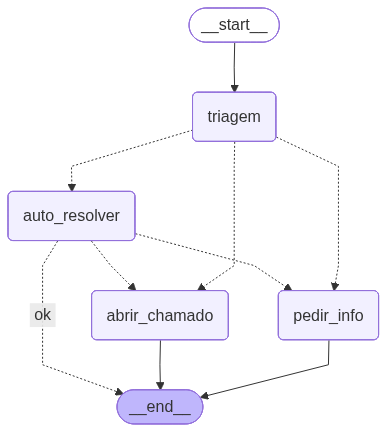

In [ ]:
# display: É uma função do IPython (usada em ambientes como Jupyter Notebooks e Colab) que permite renderizar e mostrar objetos ricos, como imagens, tabelas e gráficos, diretamente na saída da célula.

# Image: Uma classe que representa uma imagem binária.
from IPython.display import display, Image

# grafo.get_graph(): Este método acessa a estrutura interna do seu objeto grafo, que contém todos os nós, arestas e a lógica do seu fluxo de trabalho.

# .draw_mermaid_png(): Este é o método que faz a mágica. Ele gera um diagrama no formato Mermaid (uma linguagem de texto para criar diagramas) e, em seguida, converte esse diagrama em um arquivo de imagem PNG. O resultado é armazenado na variável graph_bytes como dados binários.
graph_bytes = grafo.get_graph().draw_mermaid_png()

# Esta linha final usa a função display para renderizar a imagem. Ela pega os dados binários (graph_bytes) e os passa para o objeto Image, que então é exibido na saída do notebook.
display(Image(graph_bytes))


In [31]:
testes = ["Posso reembolsar a internet?", "Quero mais dias de trabalho remoto, como faço?", "posso reembolsar cursos ou treinamentos da Alura?", "É possivel reembolsar certificações do google cloud?", "posso obter o Google Gemini de graça?", "Quantas capivaras tem no rio pinheiros?"]

In [ ]:
# Esta linha inicia um loop que irá percorrer cada uma das perguntas de teste que estão na nossa lista testes. O código dentro do loop será executado uma vez para cada pergunta.
for msg_teste in testes:
    
    # Esta é a linha mais importante. Ela inicia a execução do nosso grafo do LangGraph.
    # grafo.invoke(): Chama o nosso grafo compilado.

    # {"pergunta":msg_teste}: Passa a pergunta de teste atual (msg_teste) como entrada para o grafo, usando a chave "pergunta". O grafo irá usar essa chave para iniciar o fluxo no nó de triagem.
    
    resposta_final = grafo.invoke({"pergunta":msg_teste})
    
    # Esta linha acessa o estado final e tenta pegar o resultado da triagem. O uso do método .get() é uma prática de segurança. Se a chave "triagem" existir, ele retorna o dicionário com a decisão. Se não, ele retorna um dicionário vazio, evitando um erro de tipo.
    resultado_triagem = resposta_final.get("triagem", {""})
    
    # Estas linhas imprimem o resultado principal de cada teste, formatando a saída para fácil visualização:
    print(f"pergunta: {msg_teste}")
    
    print(f"Decisão: {resultado_triagem.get("decisao")}, URGENCIA: {resultado_triagem.get("urgencia")} | AÇÃO FINAL: {resposta_final.get("acao_final")}")
    
    print(f"Resposta: {resposta_final.get("resposta")}")

    # Esta linha verifica se a resposta do agente contém citações. Se o agente executou o nó auto_resolver com sucesso, essa chave existirá, e o bloco de código dentro do if será executado.
    if resposta_final.get("citações"):
        
        print(f"CITAÇÕES:")
        
        # Se houver citações, este loop as percorre para imprimir os detalhes de cada documento de origem, como o nome do documento, a página e o trecho que foi utilizado para gerar a resposta.
        for citacao in resposta_final.get("citações"):
            print(f" - Documento: {citacao['documento']}, Página: {citacao['pagina']}")
            print(f"   Trecho: {citacao['trecho']}")

    print("------------------------------------")
    

Executando o nó de triagem
Decidindo após a triagem
Executando o nó de auto resolver
Decisão após o auto resolver
O rag falhou, sem keywords, vou pedir mais informações
Iniciando o nó de pedir info
pergunta: Posso reembolsar a internet?
Decisão: AUTO_RESOLVER, URGENCIA: BAIXA | AÇÃO FINAL: PEDIR_INFO
Resposta: Para avançar, preciso que detalhe: Tema e contexto especifico
------------------------------------
Executando o nó de triagem
Decidindo após a triagem
Executando nó de abrir chamado
pergunta: Quero mais dias de trabalho remoto, como faço?
Decisão: ABRIR_CHAMADO, URGENCIA: MEDIA | AÇÃO FINAL: ABRIR_CHAMADO
Resposta: Abrindo chamado com urgência MEDIA.Descrição:Quero mais dias de trabalho remoto, como faço?
------------------------------------
Executando o nó de triagem
Decidindo após a triagem
Executando o nó de auto resolver
Decisão após o auto resolver
O rag falhou, sem keywords, vou pedir mais informações
Iniciando o nó de pedir info
pergunta: posso reembolsar cursos ou treinam